<a href="https://colab.research.google.com/github/DevilNReality/LR-Real-Estate-Price-Prediction/blob/main/Code%20File/LR_Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Approach To The Problem



* Load the data and libraries
* Data Preparation and Transformation
* Visualization
* Analysis
  * Uni-Variate
  * Bi-Variate
  * Multi-Variate
    * Supervised
      * Classified: Y is discrete (0/1)
      * Regression: Y is continuous
    * Unsupervised
* Splitting Of Dataset
* Model Creation
* Validation




# Load Data and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from scipy.stats import chi2_contingency

In [ ]:
dataset = pd.read_csv('/content/Real estate.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
dataset.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


# Exploratory Data Analysis


In [ ]:
dataset.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [ ]:
dataset.skew()

No                                        0.000000
X1 transaction date                      -0.150572
X2 house age                              0.382926
X3 distance to the nearest MRT station    1.888757
X4 number of convenience stores           0.154607
X5 latitude                              -0.438598
X6 longitude                             -1.219591
Y house price of unit area                0.599853
dtype: float64

## Uni-Variate Analysis

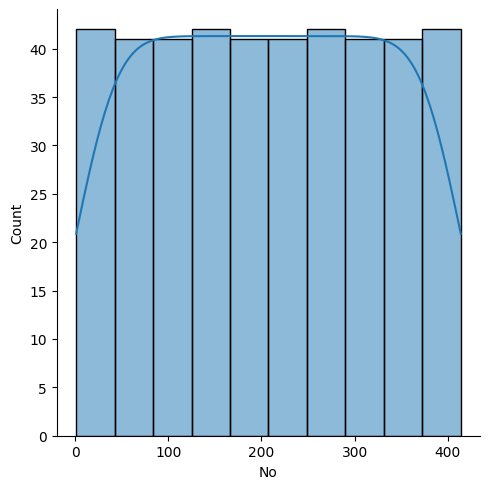

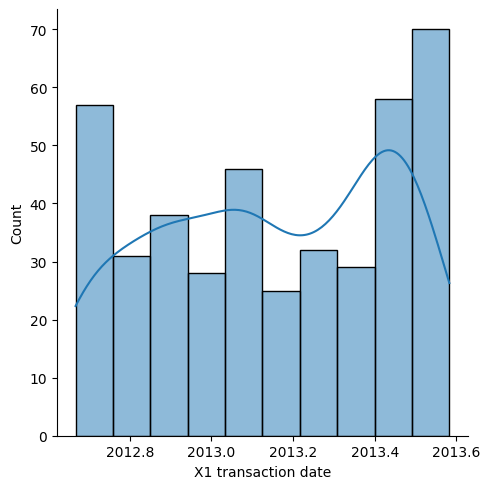

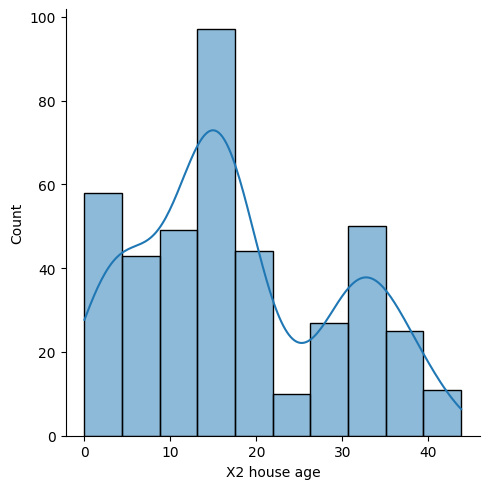

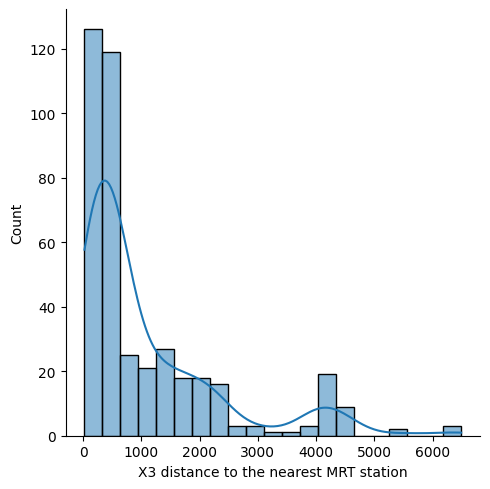

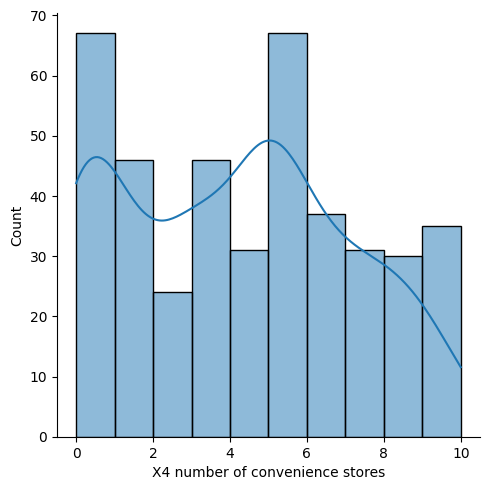

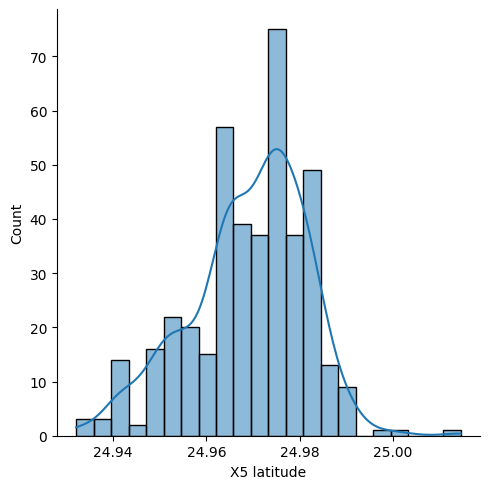

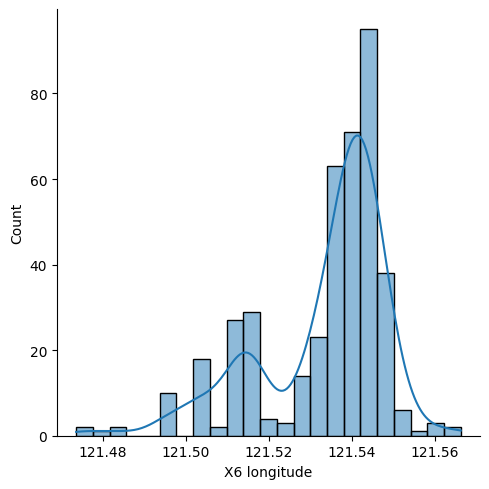

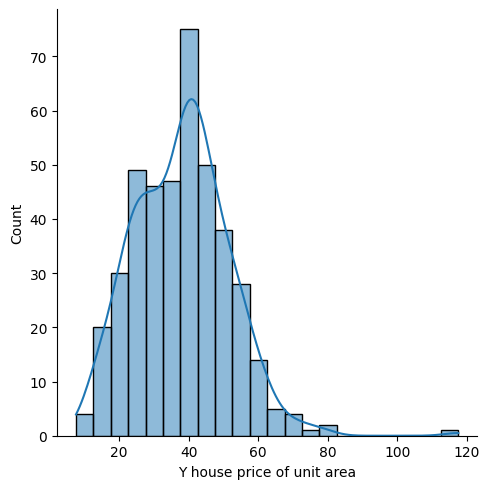

In [ ]:
for i in dataset.columns :
  sns.displot(dataset[i] , kde = True)

## Bi-Variate Analysis

<Axes: >

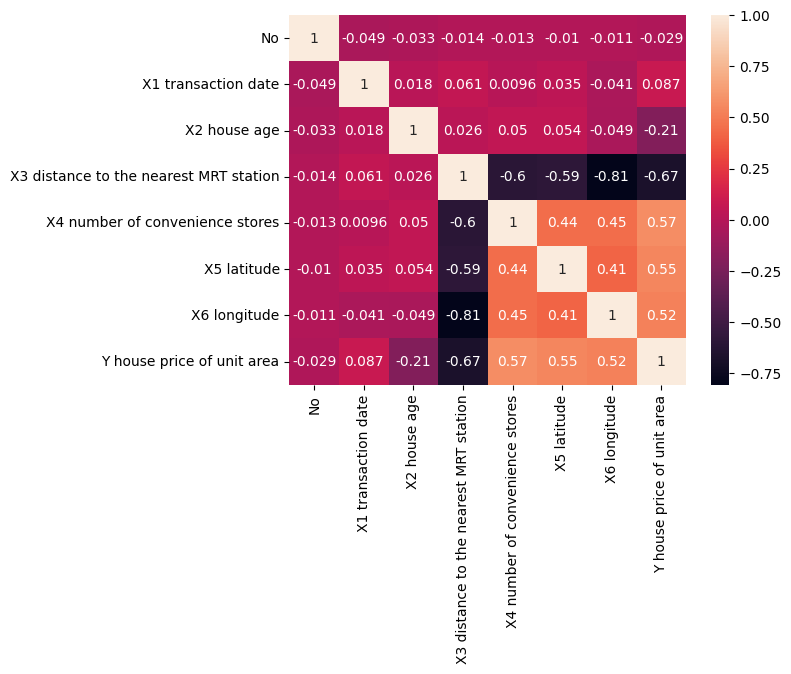

In [ ]:
sns.heatmap(dataset.corr() , annot = True)

# Data Preparation

In [ ]:
def data_prep(data):
  #Remove Unwanted Columns
  data.drop(['No'] , inplace = True , axis = 1)

  #Change DataType
  data['X1 transaction date'] = data['X1 transaction date']. astype(int)

In [ ]:
data_prep(dataset)

In [ ]:
dataset.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012,5.0,390.56840,5,24.97937,121.54245,43.1


# Splitting Of Dataset

In [ ]:
x = dataset.drop(['Y house price of unit area'] , axis = 1)
y = dataset['Y house price of unit area']

In [ ]:
print(x.shape)
print(y.shape)

(414, 6)
(414,)


In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(331, 6)
(83, 6)
(331,)
(83,)


# Linear Regression

In [ ]:
lr = LinearRegression()
# Fit the Model
lr.fit(x_train , y_train)

LinearRegression()

In [ ]:
print(lr.intercept_)

-7283.422928848024


In [ ]:
print(lr.coef_)

[ 2.64305154e+00 -2.76112162e-01 -4.60949094e-03  1.11672009e+00
  2.38195964e+02 -3.24228832e+01]


In [ ]:
for coef, feature in zip(lr.coef_, x_train.columns):
    print(f"{feature}: {coef:.4f}")  # Format to 4 decimal places

X1 transaction date: 2.6431
X2 house age: -0.2761
X3 distance to the nearest MRT station: -0.0046
X4 number of convenience stores: 1.1167
X5 latitude: 238.1960
X6 longitude: -32.4229


In [ ]:
y_hat_train = lr.predict(x_train)
y_hat_test = lr.predict(x_test)

In [ ]:
rmse_train =np.sqrt( mean_squared_error(y_train , y_hat_train))
print("The RMSE for the train is:", round(rmse_train,2))

The RMSE for the train is: 9.17


In [ ]:
rmse_test =np.sqrt( mean_squared_error(y_test , y_hat_test))
print("The RMSE for the test is:", round(rmse_test,2))

The RMSE for the test is: 7.15


In [ ]:
r2_score_train =(r2_score(y_train , y_hat_train))
print("The R2 score for the train model is:", round(r2_score_train,2))

The R2 score for the train model is: 0.55


In [ ]:
r2_score_test =(r2_score(y_test , y_hat_test))
print("The R2 score for the test model is:", round(r2_score_test,2))

The R2 score for the test model is: 0.7
